In [2]:
from sklearn.neighbors import KNeighborsClassifier
from matplotlib import pyplot as plt
from collections import defaultdict
from warnings import filterwarnings
import joblib as jl
import pandas as pd
import numpy as np
import cv2 as cv
import os

In [109]:
filterwarnings('ignore', category=UserWarning)
old_model = jl.load('./new_model.joblib')

In [52]:
src_path = './cells/'
dst_path = './numbers_for_dataset/'
dst_path2 = './test_numbers_for_dataset2/'

In [66]:
cont = defaultdict(int, {1: 8, 0: 12, 8: 5, 7: 7, 9: 7, 3: 6, 4: 8, 2: 5, 5: 5, 6: 6})

In [132]:
# repeat to increase the num of examples changing the images from cells
for _, _, files in os.walk(src_path):
  for f in files:
    img = cv.imread(src_path + f)
    img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    # img_resized = cv.resize(img, (20, 20))
    p = int(old_model.predict([img.flatten()])[0])
    cv.imwrite(dst_path2 + f'{p}_{cont[p]}.png', img)
    cont[p] += 1

In [58]:
cont

defaultdict(int, {1: 2, 0: 60, 8: 1, 7: 1, 9: 2, 3: 6, 4: 3, 2: 3, 5: 3})

In [133]:
cols_names = {'label': []}
for i in range(1, 51):
  for j in range(1, 51):
    cols_names['%dx%d' % (i, j)] = []

df = pd.DataFrame(cols_names)
df

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,50x41,50x42,50x43,50x44,50x45,50x46,50x47,50x48,50x49,50x50


In [134]:
for _, _, files in os.walk(dst_path):
  for f in files:
    label = f[0]
    img = cv.imread(dst_path + f)
    img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    row = img.flatten()
    row = np.concatenate([[label], row])
    df.loc[len(df)] = row

len(df)

80

In [5]:
df = pd.read_csv('new_dataset.csv')

In [135]:
new_model = KNeighborsClassifier(n_neighbors=3)
X = df.drop('label', axis=1)
y = df['label']
new_model.fit(X, y)

KNeighborsClassifier(n_neighbors=3)

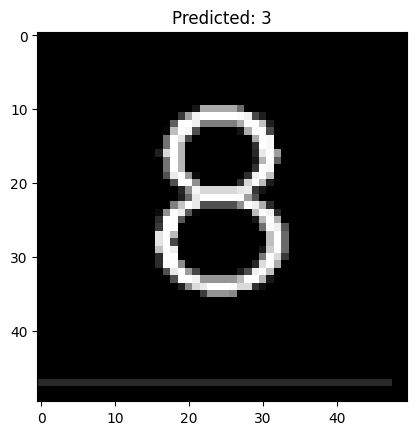

In [125]:
img = cv.imread(src_path + 'cell_8_2.png')
img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
row = img.flatten()
p = int(new_model.predict([row])[0])

plt.imshow(img, cmap=plt.cm.binary)
plt.title(f'Predicted: {p}')
plt.show()

In [136]:
jl.dump(new_model, 'new_model.joblib')

['new_model.joblib']

In [ ]:
df.to_csv('new_dataset.csv', index=None)